# Sentiment analysis
#### Aim: quantify sentiments of students' review of the course and use that score for data wrangling

### 1. Import libraries and load dataset

Assumes requirements in nltk_env.yaml.
Please refer to README.md for loading these requirements on conda.

In [1]:
import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
nltk.download(["vader_lexicon","stopwords",])

from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/tey15/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/tey15/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
analyzer.polarity_scores("I love Dr. Colaresi's scientific computation class")

{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}

In [3]:
analyzer.polarity_scores("I love Dr. Colaresi's scientific computation class!!!")

{'neg': 0.0, 'neu': 0.496, 'pos': 0.504, 'compound': 0.7249}

dataset:  Course Reviews University of Waterloo
https://www.kaggle.com/datasets/anthonysusevski/course-reviews-university-of-waterloo

Download csv files from the kaggle website then import csv files into pandas dataframe.

In [4]:
df=pd.read_csv('course_data_clean.csv')

In [5]:
df.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0


### 2. Preprocessing

General NLTK preprocessing is not needed. However, I remove missing values for the simplicity of the analysis. Missing values are very rare for my dataset.

In [6]:
df.reviews.apply(type).value_counts()

<class 'str'>      14829
<class 'float'>        9
Name: reviews, dtype: int64

In [7]:
df[df.reviews.apply(type) == float]

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
2810,SPCOM 223,Public Speaking,498,68%,73%,71%,125,NaN,disliked course,0.0
5982,PSYCH 207,Cognitive Processes,165,75%,75%,75%,39,NaN,disliked course,0.0
6540,COOP 2,Co-operative Work Term,136,93%,84%,95%,7,NaN,liked course,1.0
6578,ARBUS 101,Introduction to Business in North America,135,52%,67%,43%,30,NaN,disliked course,0.0
8311,PD 5,Project Management,80,37%,74%,25%,12,NaN,disliked course,0.0
8373,AHS 107,"Sociology of Activity, Health, and Well-being",78,27%,93%,40%,27,NaN,NaN,NaN
10542,ECE 458,Computer Security,39,91%,57%,77%,6,NaN,disliked course,0.0
11287,WKRPT 400M,Work-term Report,31,0%,20%,6%,3,NaN,disliked course,0.0
11395,BIOL 266,Introduction to Computational Biology,29,90%,68%,83%,10,NaN,liked course,1.0


remove 9 cases that have missing for reviews for simplicity

In [8]:
df = df.dropna(subset=['reviews'])

In [9]:
df.reviews.apply(type).value_counts()

<class 'str'>    14829
Name: reviews, dtype: int64

In [10]:
df.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0


### 3. Word frequency

To understand the general picture of text, I counted the word frequency.
For counting the word frequency, I made words in lower cases, tokenized by word, removed stopwords, then summarizing the 15 most frequent words in the graph. 

In [11]:
df['reviews_lower'] = df['reviews'].str.casefold()
df.shape[0]

14829

In [12]:
regexp = RegexpTokenizer('\w+')

df['text_token']=df['reviews_lower'].apply(regexp.tokenize)
df.head(3)

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,reviews_lower,text_token
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,go to office hours and practice,"[go, to, office, hours, and, practice]"
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,one of my least favourite courses. although th...,"[one, of, my, least, favourite, courses, altho..."
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,it starts with a very low pace but after midte...,"[it, starts, with, a, very, low, pace, but, af..."


In [13]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [14]:
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,reviews_lower,text_token
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,go to office hours and practice,"[go, office, hours, practice]"
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,one of my least favourite courses. although th...,"[one, least, favourite, courses, although, thi..."
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,it starts with a very low pace but after midte...,"[starts, low, pace, midterm, gets, really, fas..."


In [15]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x]))


In [16]:
df[['reviews', 'text_token', 'text_string']].head()

,reviews,text_token,text_string
0,go to office hours and practice,"[go, office, hours, practice]",go office hours practice
1,One of my least favourite courses. Although th...,"[one, least, favourite, courses, although, thi...",one least favourite courses although things ni...
2,It starts with a very low pace but after midte...,"[starts, low, pace, midterm, gets, really, fas...",starts low pace midterm gets really fast canno...
3,Took this in 2018 with no programming experien...,"[took, 2018, programming, experience, ever, st...",took 2018 programming experience ever started ...
4,I loved everything about cs 115. Great instruc...,"[loved, everything, cs, 115, great, instructor...",loved everything cs 115 great instructors fair...


In [17]:
all_words = ' '.join([word for word in df['text_string']])

In [18]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [19]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'course': 14401, 'easy': 3870, 'assignments': 3061, 'class': 2895, 'really': 2780, 'interesting': 2668, 'final': 2363, 'content': 2347, 'lot': 2195, 'time': 2007, ...})

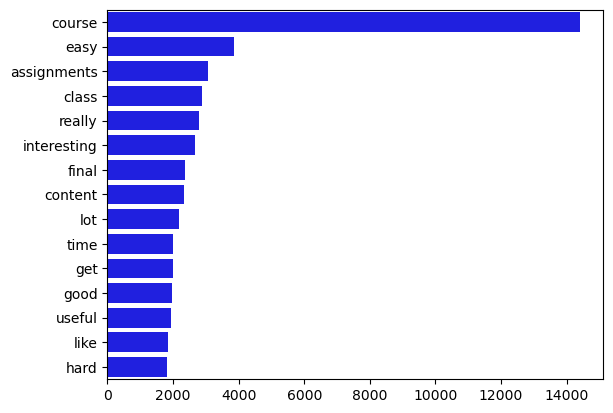

In [20]:
# Obtain top 15 words
top_10 = fdist.most_common(15)

# Create pandas series to make plotting easier
f10dist = pd.Series(dict(top_10))
sns.barplot(y=f10dist.index, x=f10dist.values, color='blue');

It seems that students talk about the level of class, the workload of assignments, and class contents. These are general course reviews.

This is a quick wrangling for word frequency. For a more rigid way, you may do lemmatization. Refer this resource. https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

### 4. Generating sentiment scores

Some reviews have multiple sentences. The VADER's sentiment score is sensitive to the number of words as described in this article. https://medium.com/@piocalderon/vader-sentiment-analysis-explained-f1c4f9101cd9
Thus, I calculate the sentiment scores for each sentence then compute the average of sentiment scores for each review. Refer the walk-through example of this in the other dataset here. https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer

tokenize by sentences
https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame

In [21]:
df['tokenized_reviews'] = df.apply(lambda row: nltk.sent_tokenize(row['reviews']), axis=1)

In [22]:
df['tokenized_reviews'].head()

0                    [go to office hours and practice]
1    [One of my least favourite courses., Although ...
2    [It starts with a very low pace but after midt...
3    [Took this in 2018 with no programming experie...
4    [I loved everything about cs 115., Great instr...
Name: tokenized_reviews, dtype: object

In [23]:
result=[]
for row in df["tokenized_reviews"]:
    total=0
    count=0
    for element in row:
        total+=analyzer.polarity_scores(element)["compound"]
        count+=1
    if count >0:
        average=total/count
        print(average)
        result.append(average)
df["agg_polarity"]=result

0.0
0.28253333333333336
0.383725
-0.107325
0.5776
0.19747499999999998
0.37696250000000003
0.2843125
0.02044999999999998
0.6064499999999999
-0.15423333333333333
0.37575000000000003
0.546
0.2827
0.3443833333333333
0.7104
-0.23345
0.24206666666666665
-0.042300000000000004
0.7184666666666667
-0.044199999999999996
-0.4201
-0.01761428571428571
0.0
0.5240666666666667
0.4927
0.4674
0.38683333333333336
0.0258
0.46704999999999997
0.1997
0.5085666666666667
-0.125
0.5106
-0.5719
0.22365000000000002
0.48095000000000004
0.7307
0.2873
0.5994
0.019799999999999998
0.4927
0.5542
-0.0258
0.7269
0.54895
0.11883333333333335
0.4058
-0.6297
0.13648
0.6994
0.0
0.6249
0.2781
0.0
0.07522499999999999
0.6124
0.2202
0.0
-0.296
0.43095
-0.1741
0.3498333333333334
0.4404
-0.6917
0.25433333333333336
0.06092000000000001
0.30025
0.1754
0.398625
0.6093500000000001
0.4404
0.4404
0.22278000000000003
-0.017499999999999988
0.7746
-0.2051
0.8006
0.6808
0.4215
0.3612
-0.1027
0.4601
0.6908
0.0
-0.026524999999999993
0.4588
0.584

0.0
0.8402
0.1901
-0.12564999999999998
0.11380000000000001
0.2023
0.1245
0.23835
0.296
-0.15835
-0.14250000000000002
0.53755
0.3182
0.2779333333333333
0.2924
0.4588
0.4576
0.2202
0.24833333333333332
0.296
0.2382
0.7777
0.27115
0.21186666666666665
0.59894
0.0
0.4404
0.06275
0.3804
0.0
0.2846
0.5222
-0.092
0.4256
0.7346
-0.29685
0.7841
0.24635
-0.05135
0.22142499999999998
0.6808
-0.5327333333333333
-0.012199999999999989
0.2382
0.7579
0.37924285714285716
0.431
0.6038
0.4144
0.27245
0.4124
0.17440000000000003
0.40206
0.511
-0.15286666666666668
0.3509666666666667
0.49835
0.022924999999999994
-0.1858
-0.053428571428571436
0.12314000000000003
0.40032500000000004
0.16565000000000002
0.006240000000000012
0.13985
0.11132500000000001
0.0421
0.25774285714285716
0.10376666666666666
-0.18306363636363637
0.34
0.2346125
0.03626666666666666
0.26936
0.0
0.2756
-0.10147500000000001
0.45135000000000003
0.32415
0.42873333333333336
0.7003
0.19565
0.40080000000000005
-0.022660000000000013
0.3612
0.4811999999

-0.9445
0.2732
0.21075
-0.0019500000000000073
0.0
0.5126
0.3387636363636364
0.4227625
0.6170666666666667
0.460175
0.5319
0.164775
0.32683999999999996
0.53075
0.0
0.29228461538461536
0.24695
0.3612
0.17477333333333336
0.07533333333333335
0.39932500000000004
0.33215
-0.07543333333333334
0.21075
0.25345384615384614
0.2202
0.1779
-0.3818
0.0
0.21863333333333332
0.2599
0.29074999999999995
0.0
0.5836
0.5994
0.0
0.4404
0.41201999999999994
0.11406666666666666
0.41355
0.30396666666666666
0.46708333333333335
-0.04849999999999995
0.4926
-0.3612
0.11462499999999999
-0.4588
0.10535
0.23775000000000002
0.17968571428571428
0.4404
-0.3182
0.11758750000000001
-0.20095
0.4939
-0.1761
0.5927
0.2083
-0.3421
0.0
0.6053999999999999
0.5426333333333333
0.0
0.3062
0.39926666666666666
0.0
0.6361
0.08843333333333336
0.3685333333333333
0.4404
0.4588
-0.25
0.2023
0.4404
0.431
0.4153
0.6588
0.0
0.6249
-0.029966666666666697
-0.5719
0.5606
0.36345
0.1409
0.0
0.54405
0.8316
0.4404
0.60545
0.38075000000000003
0.5441
0.

0.46715
0.24695
-0.031799999999999995
0.3311
-0.1027
0.2852818181818182
0.1249
-0.03905
0.0121
0.5574
-0.36715
0.5984
0.2546333333333333
0.32926666666666665
0.49934999999999996
-0.4201
0.32005
0.12689999999999999
0.029679999999999995
0.3282
0.2997
0.6705
0.4968
0.32706666666666667
0.181425
0.344725
0.6395
-0.40375
0.31245
-0.105025
0.0
0.0266
0.191
0.5859
0.23786666666666667
-0.1761
0.125
-0.5719
-0.6751
-0.0862
0.7096
-0.010249999999999981
0.20420000000000002
0.0
0.0332
-0.28525
0.005199999999999982
-0.6126
-0.5423
0.21445000000000003
0.4353666666666667
0.0408
-0.2501666666666667
-0.4754
-0.47505
-0.14428333333333335
-0.14830000000000002
0.18429999999999996
-0.029625000000000002
0.0
-0.10774999999999998
0.2382
0.6969333333333333
0.0772
0.0
-0.09879999999999997
-0.32955
0.0
0.2023
0.0258
0.7096
-0.32716666666666666
-0.2592
0.3412
0.6956
0.13839999999999997
-0.10435
0.24635
0.18071428571428574
0.563275
-0.1027
-0.6249
0.0
0.7597
0.64185
0.230575
0.3326
0.5499
-0.015849999999999975
0.362

-0.19099999999999998
0.11161666666666668
-0.024933333333333346
0.01951250000000003
-0.2661
0.06421666666666667
0.296
0.16789999999999997
0.135
0.08194999999999997
-0.012924999999999992
0.04625000000000001
0.66725
-0.7687
-0.02007500000000001
0.3506
0.273
0.0
0.7713
0.6535500000000001
-0.1245
0.6369
0.1901
0.009800000000000003
0.12788
0.3448
0.55872
0.4404
0.146675
-0.2457
0.4404
0.05135
0.26364
0.2202
0.2202
0.4023666666666667
-0.012225000000000014
-0.01783333333333333
0.25
-0.13813333333333333
0.8679
0.5106
-0.3182
0.2202
0.0757
-0.1429
0.14075
0.2716
-0.1706
0.07655
0.23085
0.2023
0.736
0.21075
0.0
0.21075
-0.11480000000000001
0.11029999999999998
0.7045999999999999
0.44789999999999996
0.4404
0.0
0.4215
0.2523
0.37995
0.57125
0.32005
-0.05606666666666666
0.14405
0.41025
0.6682
0.0
0.0
0.4939
0.24695
0.8402
0.19623333333333334
0.0
-0.1283
-0.4517
0.3632
0.36345
0.4215
0.38075000000000003
0.6588
0.0
0.0
0.10115
0.8074
0.3225
0.24695
0.0
0.5106
0.0
0.0
0.2202
0.255
0.2155
0.4404
-0.2608


0.7144666666666667
0.6044
0.5912666666666667
0.26311666666666667
0.34086666666666665
0.0
0.21666666666666667
0.4404
0.16025
0.505225
0.04151428571428571
-0.17463333333333333
0.4939
0.05435000000000001
-0.31126666666666664
-0.37729999999999997
-0.05374999999999998
0.8437
0.0
0.54405
0.30334000000000005
0.22866666666666666
0.5719
0.8081
0.13925
0.057999999999999996
0.6908
0.7717
0.562
-0.4215
0.5514749999999999
0.1468
0.07590000000000001
0.7162333333333333
0.66225
0.4404
0.22479999999999997
0.6369
0.243525
-0.2755
0.50484
0.45393333333333336
0.4431999999999999
0.55915
0.8689
0.20215000000000002
0.45625000000000004
0.1646
0.16885
0.4215
0.7264
0.30116666666666664
0.3854333333333333
0.3499666666666666
0.32135
0.0
0.3994
0.1824
0.019466666666666688
0.335075
-0.135575
0.054900000000000004
-0.13085
0.24396666666666667
0.09755
0.2356
-0.3698
0.4939
0.5832333333333334
-0.48440000000000005
0.33014
0.3818
0.09469999999999999
-0.1901
0.58365
0.17005
0.2182
0.0
0.09085000000000001
0.3369
0.29800000

0.57575
0.35015
0.4939
-0.050949999999999995
0.6241
0.06565
-0.128
0.021466666666666665
0.8689
-0.38625
0.50995
0.27753333333333335
0.6588
0.5563
0.4215
0.5588
0.3251
0.0
0.6283333333333333
0.39025
0.14699473684210526
0.6406
0.66465
0.34438
0.14814444444444444
0.2729333333333333
0.21345999999999998
0.32942
0.3492
0.5640499999999999
0.4906333333333333
0.1647
0.265075
0.32878333333333337
0.029325000000000018
0.014316666666666672
0.5868000000000001
0.10176666666666667
0.3919
0.11856
0.6188333333333333
0.31845
0.6261
0.27553333333333335
0.714
0.178
0.0
0.7337
0.3294
0.11919999999999999
0.0
0.3294
0.1027
0.3336
0.0
0.34
0.0
0.43216
-0.3182
0.3825
-0.1952
0.1953
0.0
0.4404
0.4404
0.636
0.76925
0.0
0.27836
0.0
-0.4215
0.0762
0.0
0.8271
-0.22195
-0.34369999999999995
0.20413333333333336
-0.06015000000000001
0.4215
-0.765
0.32243333333333335
0.06878888888888889
-0.016349999999999976
0.8294
0.20126
0.3415
0.0
0.39505
0.63495
0.8453666666666666
0.47136666666666666
0.26720000000000005
0.45635
0.560

-0.16870000000000002
0.0
-0.2563
0.2202
0.0023999999999999994
-0.3374
-0.10611999999999999
0.0
0.11315
0.21075
0.43146666666666667
0.02268
0.01935
-0.1591
0.0
0.0
0.0258
0.0
0.4215
0.2202
0.030349999999999988
0.1889
0.0
0.3159
-0.45375
0.7137
0.8442
0.7939
0.07306
0.4576
0.0
0.170125
0.0644
-0.1027
-0.34
-0.0593
0.4404
-0.0027749999999999997
0.01566666666666668
0.046040000000000005
0.054075
0.0
0.27605
-0.08677999999999997
-0.06575000000000002
-0.06977142857142857
0.0975
-0.6619
0.04785555555555556
0.3062
-0.27578
-0.22378
0.125
0.2212
0.057779999999999984
-0.35628571428571426
0.0
-0.14759999999999998
0.516
0.156125
-0.10236666666666666
-0.369825
0.03806666666666666
0.005800000000000005
-0.45794999999999997
0.0
0.2724
0.0
0.44913333333333333
-0.27115
-0.2553
-0.2621
0.1998
-0.7579
0.43802
-0.3412
0.194575
0.7223666666666667
0.39366
0.54862
-0.11976666666666665
0.667675
-0.15445
0.44040000000000007
0.27734
-0.02965000000000001
0.7202999999999999
0.5457
0.3825
0.45217999999999997
-0.0416

0.23574
0.12283333333333334
0.7496
-0.1759
0.12916666666666668
0.36755
0.3818
0.22573333333333334
0.4019
0.5625500000000001
-0.06945
0.285625
0.30057500000000004
0.13335
0.13020000000000004
0.6910499999999999
0.3138666666666667
0.6304000000000001
-0.20145000000000002
0.3788
0.0
0.0
0.12040000000000001
0.0
-0.5594
-0.228
-0.6369
0.802
0.1027
0.0
0.0129
-0.128
0.5015
0.46775
0.20425000000000001
0.6512666666666668
-0.5574
-0.7003
-0.51055
0.4283333333333333
0.1101
0.4927
0.4927
0.1807
0.66445
0.5106
0.7264
0.5443
0.44155
0.1779
0.4404
0.18359999999999999
0.136275
0.8408
0.8313
0.123575
-0.030350000000000002
0.0
-0.5706
0.37433333333333335
0.373725
0.1879
0.05103333333333335
0.488225
0.11177999999999999
0.38023333333333337
0.359125
0.3913
0.375
0.512925
0.31245
0.4404
0.03419999999999998
0.10547499999999997
0.125
-0.148
0.1744
-0.6908
0.4404
0.21075
0.4865333333333333
0.37135
0.0
0.0
0.006300000000000004
0.28555
0.3452
0.0
0.0
0.5719
0.0
0.552
0.2944
0.0
0.7712
0.0
0.6887
-0.1268
0.2023
0.

0.3789
0.41365999999999997
0.457
0.38
0.3119
0.20063333333333333
0.5292
0.27312
0.72485
0.15435000000000001
0.5987666666666667
0.38775
0.0
0.7264
0.26632500000000003
0.3404
0.16463333333333333
0.46655
0.17
-0.1027
-0.01090000000000002
-0.25229999999999997
-0.1027
0.0
0.7339
-0.019750000000000018
0.0
0.423225
0.0
0.06153333333333333
0.32783333333333337
0.24695
0.3101
-0.1997
0.19595
0.0
0.4939
0.2202
0.1513
-0.3291
0.04600000000000001
0.31726666666666664
0.265075
0.4939
0.6080333333333333
0.0129
0.8429
0.69415
0.42510000000000003
0.0825
0.40845
0.25992499999999996
-0.3612
-0.068875
0.2202
0.7743
0.4588
0.47514
0.0
0.3522666666666667
0.5331
0.46862500000000007
0.48503333333333337
0.5907666666666667
0.6642
0.712375
0.7006857142857142
0.22296666666666665
0.3325
0.5927
-0.3875
0.4477
-0.6309
0.5279
0.08825
0.44535
0.41635
0.059
-0.4215
-0.09096666666666665
-0.4118
-0.008886666666666664
0.0138
0.2023
0.21593333333333334
0.08635
0.32155
0.0
0.21230000000000002
0.43679999999999997
-0.43
0.4672

0.2382
0.4939
-0.5366500000000001
-0.4019
0.4404
0.1939
-0.40914
0.0772
0.42785
-0.5165
0.29850000000000004
-0.057575
-0.0657625
-0.2653
-0.47595
0.3960333333333333
-0.038500000000000006
0.14441666666666672
0.348775
0.0013333333333333346
0.0639
0.4561
0.3959
0.5574
0.06130000000000001
0.0
0.02043333333333332
-0.21285
-0.4215
-0.10436666666666666
0.5167333333333334
0.13780000000000003
0.40712000000000004
0.43745
-0.57165
0.5555333333333333
0.5106
0.4404
-0.036287499999999986
0.46340000000000003
0.28545
-0.009309999999999988
0.6846
-0.16873999999999997
0.6783
0.18666666666666668
0.13396666666666665
0.07800000000000001
0.35685
-0.1003
-0.10813333333333335
0.06574
0.02643750000000001
-0.09365
0.14976
0.04680000000000001
0.45667499999999994
0.0
-0.05466666666666666
0.07872500000000002
0.372375
0.1101
0.2766
-0.1779
0.32153333333333334
0.272025
0.3716
-0.11333333333333334
-0.6369
-0.0954
-0.386475
0.6369
-0.23769999999999997
0.0
0.0386
0.21509999999999999
-0.05147500000000001
0.298175
0.2270

0.62355
0.2202
0.558175
0.33596000000000004
0.5106
0.32289999999999996
0.9245
0.22855
0.7959
0.7344666666666667
0.76935
0.4404
0.4228
0.67165
0.624
0.63325
0.4408666666666667
0.051350000000000014
0.5126000000000001
0.3934
0.40858
0.75285
0.8928
0.34392500000000004
0.5231625
0.3358333333333334
0.0
0.4019
0.2968
0.59885
0.31935
0.3178666666666667
0.08993333333333332
0.61955
0.056616666666666676
0.25145
-0.31245
-0.296
-0.4023
0.0
0.11315
-0.2128
-0.0129
0.6124
0.6369
-0.08710000000000001
0.0
0.14900000000000002
0.05135
0.4939
-0.0267
0.6841333333333334
0.14573333333333335
0.0
0.3612
0.2778
0.33875
-0.27115
-0.1806
0.1661
0.19304999999999997
0.3457666666666667
0.46655
0.571625
0.0
0.6002
0.4218
0.28263333333333335
0.8654
0.6369
0.25073333333333336
0.304525
0.0
0.32135
0.22996666666666668
0.4179
0.43095
0.35015
0.47365
0.17306666666666667
-0.3612
0.0
0.31845
0.2887222222222222
0.3612
-0.1806
0.4571
0.4939
-0.12536666666666665
0.1806
-0.7096
0.4404
0.25
0.0
0.2553
0.15969999999999998
0.2463

0.41635
0.56345
0.0
0.0706
0.26602000000000003
0.1806
0.40630000000000005
0.0
0.3784
0.743
0.0
0.0
-0.05456666666666666
0.05435000000000004
-0.1245
-0.27115
0.041800000000000004
0.05135
0.1364
0.09106666666666667
0.4037
-0.5719
-0.1461
0.0
0.0
-0.08149999999999999
0.2553
0.42513333333333336
0.3502
0.44589999999999996
-0.05352857142857141
0.50234
0.29655
0.37000000000000005
0.1779
0.19884999999999997
0.16453333333333334
0.12040000000000001
-0.3947
-0.5423
-0.05135
0.1779
0.5622333333333333
0.037950000000000005
0.6533
0.2793
0.8625
0.3868666666666667
-0.31245
0.4404
0.0758
0.29169999999999996
0.4404
0.310675
0.7544500000000001
0.4215
-0.09183333333333334
0.5106
0.27959999999999996
-0.021150000000000002
0.21004
-0.3412
-0.27555
0.045400000000000024
-0.14223333333333335
0.2263
0.4574
0.38902499999999995
0.8128
0.25
0.39786666666666665
0.401
0.0377
-0.05695
0.4926
0.1263
0.3421
0.3291
0.2844
-0.1233
0.8807
0.66315
0.4404
0.5859
0.25383333333333336
-0.13549999999999998
-0.11245
-0.1615666666

-0.03743333333333335
0.7351
-0.4526
0.318875
0.4005
-0.04293333333333338
-0.028716666666666658
0.5238
0.14406
0.08195
0.3429
-0.02895000000000001
0.3559
0.42255
0.0
0.0
0.04083333333333332
-0.120475
0.8402
0.1101
0.0
0.8591
0.22485
-0.09185714285714286
0.14386666666666667
-0.09894
0.47655000000000003
0.2202
0.398
0.6124
0.7003
-0.5574
0.689775
-0.14745
0.43873333333333336
0.2553
0.8849
0.0
0.4981
0.4404
0.31245
0.0387
0.449
0.10346666666666665
0.23495
0.2634
0.11998000000000002
-0.148
0.0
0.2775
0.1531
0.34
0.6195
0.6164999999999999
0.5068333333333334
0.28015
0.0
0.0516
-0.1806
0.2732
-0.09979999999999999
-0.13396666666666665
-0.106
0.10843333333333333
0.10115
0.14780000000000001
-0.08256666666666666
0.25228
0.17220000000000002
0.08877499999999999
0.28635
0.154325
0.1753
0.19423333333333334
-0.09168000000000001
0.30066000000000004
0.16793999999999998
0.121925
0.34
0.7184
0.50755
0.2288
0.13023333333333334
0.026399999999999996
0.32706666666666667
0.2288
0.3337
0.60955
-0.0646
0.13396666

0.3980333333333333
-0.035699999999999996
-0.3612
0.12035
-0.5483
0.09933333333333334
0.6461
0.2745666666666667
0.6369
0.7269
0.27805
0.0
0.0
0.3612
0.0772
-0.033966666666666666
0.15125
0.47380000000000005
-0.3404333333333333
0.15036666666666668
0.11494736842105265
0.40387500000000004
-0.3688
0.32739999999999997
0.33585
0.15387857142857145
0.2382
0.0
0.4865333333333333
0.6705
0.3387
0.4404
-0.06033333333333333
-0.04730000000000001
0.4404
0.31803333333333333
0.030550000000000008
-0.014824999999999991
0.0
0.2732
0.34835714285714287
0.11576
-0.13932500000000003
-0.0344375
0.54545
0.2191
0.44898
0.11170000000000001
0.20525
0.3107
0.09448571428571428
0.07626666666666666
0.59712
0.19533333333333333
0.0
0.025400000000000002
0.2713666666666667
0.5994
0.007454545454545461
-0.038271428571428574
-0.009660000000000007
0.6476
0.0
0.04306666666666667
0.6249
0.21075
0.4542
-0.296
0.20095
0.0
0.8185
0.7003
0.0
0.3612
0.29675
0.5354749999999999
-0.3409
0.20850000000000002
0.0
0.6638
0.0
0.1956
0.42025
0

0.12643
0.20095
0.26255
0.6529333333333334
0.33892
0.6148333333333333
0.05135
-0.101
-0.48555000000000004
0.24102222222222222
0.11673333333333334
0.08768000000000001
0.0
-0.009075
-0.13580000000000003
0.5156
0.6486
0.34538
0.3543
0.8104
0.8999
-0.1027
0.1855
0.34003333333333335
-0.08036666666666667
0.0
0.3675333333333333
0.07955
-0.47965
0.33244999999999997
0.4446666666666667
0.6369
0.45785
0.6369
0.007800000000000029
-0.23687999999999992
0.2916875
-0.4215
0.0
0.0
-0.05414999999999999
0.3787
-0.26066666666666666
0.19656666666666667
0.49434999999999996
0.5987333333333333
0.48329999999999995
0.536325
0.23323333333333332
-0.2755
0.40088
-0.659
0.22681999999999997
0.2440571428571429
0.1716333333333333
0.071575
-0.010242857142857147
0.013075000000000003
0.3315
0.27415
0.32963333333333333
-0.3395
-0.05135
0.0
0.5672666666666667
-0.028766666666666663
-0.224725
-0.1806
0.4404
0.38023333333333337
0.22935
0.3007
0.0772
0.5317000000000001
0.29295
0.49146666666666666
0.4576
0.0
0.4035
0.8442
0.132

-0.3612
-0.3089
0.05995999999999999
0.34565
0.2523666666666667
-0.24105000000000001
-0.3167
0.3612
0.3518
-0.013449999999999993
0.0
0.3769857142857143
0.355125
0.21619999999999998
0.4692
0.6901666666666667
0.1858
0.3713714285714286
0.3932166666666667
0.13957272727272726
0.25514000000000003
0.6965
0.18654999999999997
-0.09825
0.13723333333333332
0.749
0.43910000000000005
0.12321249999999997
0.4939
0.029625000000000012
0.1706333333333333
0.12544
-0.12498000000000001
-0.12100000000000001
-0.3818
-0.13294999999999998
0.13621111111111114
0.45332000000000006
0.4689666666666667
0.04876666666666666
0.4754
-0.438
0.0
0.4158
0.10217499999999999
-0.296
0.4404
0.30452
-0.18264999999999998
0.6369
0.0
0.1798
0.4404
-0.05177999999999999
0.2994
-0.5256
0.0
0.27815
0.09526
0.5286
0.22830000000000003
0.3620666666666667
0.3898333333333334
0.5106
0.5023000000000001
-0.08805
0.4684
-0.055400000000000005
0.46141666666666664
0.56775
0.5847
0.39653333333333335
0.26282
0.22223333333333337
0.10439999999999999
0

0.08653333333333334
0.2561666666666667
0.2545
0.49155000000000004
0.44331666666666664
0.22864999999999996
0.07220000000000001
-0.030685714285714292
0.36756666666666665
0.2544
0.7906
0.342725
0.36345
0.51315
-0.11315
0.0
0.3612
0.3533
-0.1762
0.5379666666666667
0.0
0.7184
-0.02445
0.283025
0.6178
0.765
0.6081
0.06722857142857143
0.24006666666666665
0.15617142857142857
-0.4013333333333334
0.35405
0.35705000000000003
0.525325
0.585
-0.0005999999999999894
-0.5418499999999999
0.19519999999999998
0.22223333333333337
0.1468
0.15846666666666667
-0.24695
0.20095
0.30862
0.16324
0.131
0.0
0.21324285714285715
0.20285
0.4927
0.05175000000000002
0.0
0.28543333333333337
0.3818
0.8718
0.2951857142857143
0.73095
0.5916
0.3592
0.3548
0.4295
0.18329999999999996
0.10158333333333336
-0.004177777777777774
0.14255
0.479075
0.31173333333333336
0.025833333333333337
0.7096
0.6554
0.4019
0.6119
0.4302375
0.5641
0.43265
0.6124
0.0
0.24695
0.1589
0.23103333333333334
0.5855
0.11221999999999999
0.3818
0.4404
0.2827

In [24]:
df["agg_polarity"]

0        0.000000
1        0.282533
2        0.383725
3       -0.107325
4        0.577600
           ...   
14833    0.169429
14834    0.651833
14835    0.000000
14836    0.168283
14837   -0.049833
Name: agg_polarity, Length: 14829, dtype: float64

check if the calculation is right for the 3rd row.

In [25]:
list2=df['tokenized_reviews'].iloc[2]

In [26]:
total=0
for i in list2:
    total+=analyzer.polarity_scores(i)["compound"]
mean=total/len(list2)
mean

0.383725

Yes, the calculation is right.

### 5. Data wrangling

In [27]:
df["agg_polarity"].describe()

count    14829.000000
mean         0.212815
std          0.312194
min         -0.957100
25%          0.000000
50%          0.220200
75%          0.440400
max          0.967000
Name: agg_polarity, dtype: float64

<AxesSubplot:xlabel='agg_polarity', ylabel='Count'>

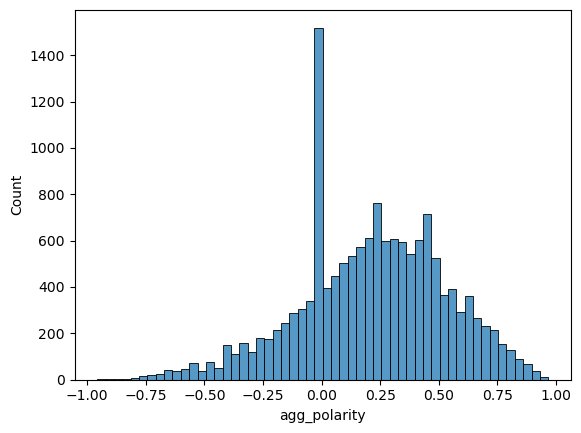

In [28]:
sns.histplot(data=df, x="agg_polarity")

In [29]:
df["agg_polarity"].mode()

0    0.0
Name: agg_polarity, dtype: float64

The mean of polarity scores is positive (0.21), but the most frequent score is 0 (the neutral).

Create three categories, positive, neutral, and negative based on the criteria used in the original analysis for VADER.
https://github.com/cjhutto/vaderSentiment

In [30]:
df['sentiment'] = df['agg_polarity'].apply(lambda x: 'positive' if x >=0.05 else 'negative' if x<=-0.05 else 'neutral')

<AxesSubplot:xlabel='count', ylabel='sentiment'>

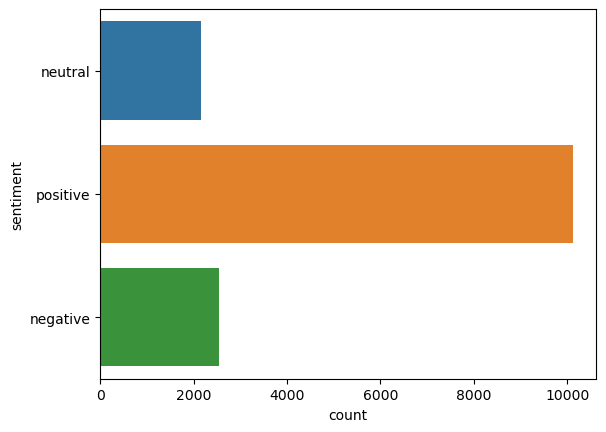

In [31]:
sns.countplot(y='sentiment', data=df)

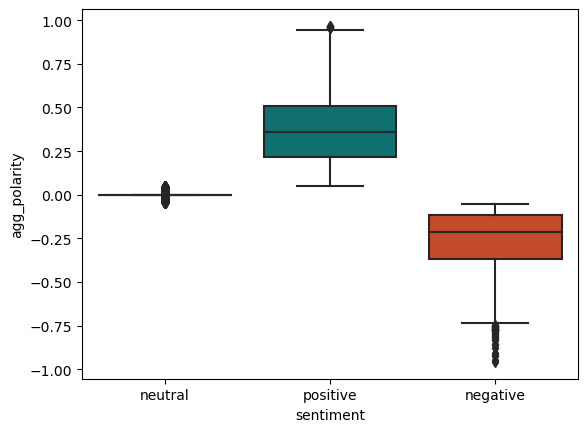

In [32]:
sns.boxplot(y='agg_polarity', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

Is a sentiment score associated with other variables?

course_rating is an individual answer for binary choices: 1. liked or 2. disliked

<AxesSubplot:xlabel='course_rating', ylabel='Count'>

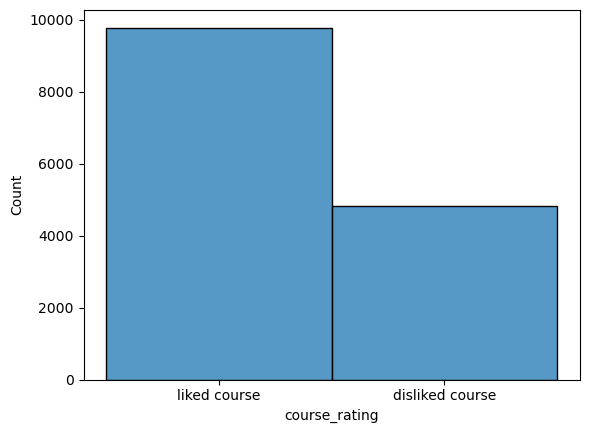

In [33]:
sns.histplot(data=df, x="course_rating")

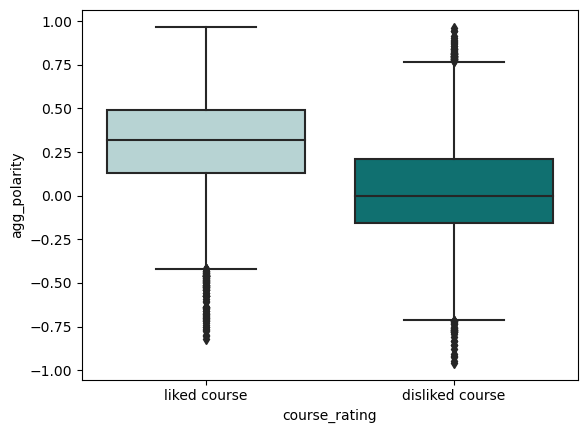

In [34]:
sns.boxplot(y='agg_polarity', 
            x='course_rating',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

The easiness of the course is an aggregate score at the course level (This is not an individual evaluation, so the analysis is exploratory). All students who sign up for the same course have the same score. I create three categories of easiness of the class and see how the sentiment differs by these categories.

In [35]:
df["easy"].head()

0    10%
1    10%
2    10%
3    10%
4    10%
Name: easy, dtype: object

remove % from "easy" column

In [36]:
df['easy'] = df['easy'].str.rstrip('%').astype('float') / 100.0

In [37]:
df["easy"].describe()

count    14826.000000
mean         0.595708
std          0.228311
min          0.000000
25%          0.430000
50%          0.620000
75%          0.760000
max          1.000000
Name: easy, dtype: float64

<AxesSubplot:xlabel='easy', ylabel='Count'>

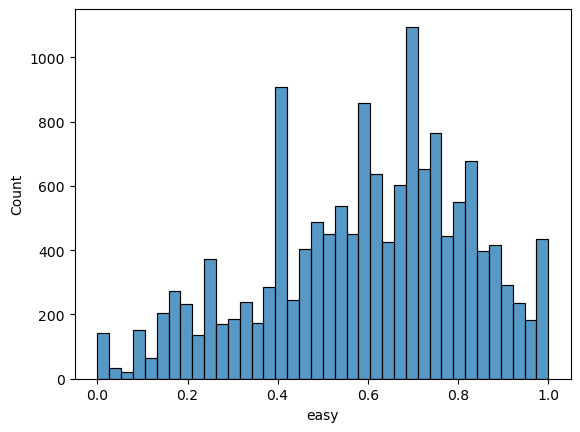

In [38]:
sns.histplot(data=df, x="easy")

In [39]:
df['level'] = df['easy'].apply(lambda x: 'easy' if x >=0.66 else 'difficult' if x<=0.33 else 'normal')

In [40]:
df["level"].head()

0    difficult
1    difficult
2    difficult
3    difficult
4    difficult
Name: level, dtype: object

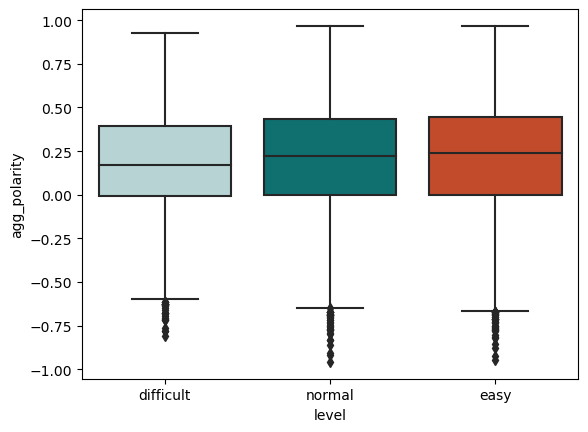

In [41]:
sns.boxplot(y='agg_polarity', 
            x='level',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

The usefulness of the course is an aggregate score at the course level (This is not an individual evaluation, so the analysis is exploratory). All students who sign up for the same course have the same score. I create two categories of usefulness of the class and see how the sentiment differs by these categories.

In [42]:
df["useful"].head()

0    21%
1    21%
2    21%
3    21%
4    21%
Name: useful, dtype: object

In [43]:
df['useful'] = df['useful'].str.rstrip('%').astype('float') / 100.0

In [44]:
df["useful"].describe()

count    14827.000000
mean         0.700612
std          0.230373
min          0.000000
25%          0.570000
50%          0.770000
75%          0.870000
max          1.000000
Name: useful, dtype: float64

<AxesSubplot:xlabel='useful', ylabel='Count'>

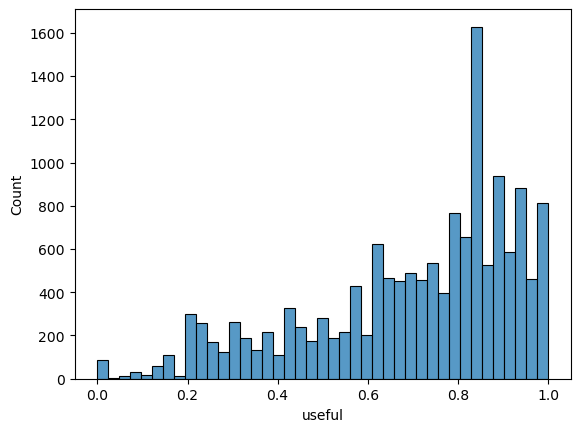

In [45]:
sns.histplot(data=df, x="useful")

In [46]:
df['useful_category'] = df['useful'].apply(lambda x: 'useful' if x >0.5 else 'not_useful')

In [47]:
df["useful_category"].head()

0    not_useful
1    not_useful
2    not_useful
3    not_useful
4    not_useful
Name: useful_category, dtype: object

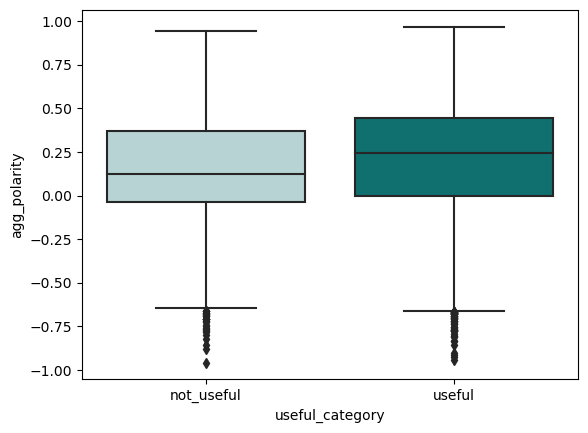

In [48]:
sns.boxplot(y='agg_polarity', 
            x='useful_category',
            palette=['#b2d8d8',"#008080"], 
            data=df);

Is the classification accurate??

In [49]:
df_sub=df[["course_rating","reviews","agg_polarity","level","useful_category"]]
df_sub.head()

,course_rating,reviews,agg_polarity,level,useful_category
0,liked course,go to office hours and practice,0.000000,difficult,not_useful
1,disliked course,One of my least favourite courses. Although th...,0.282533,difficult,not_useful
2,disliked course,It starts with a very low pace but after midte...,0.383725,difficult,not_useful
3,liked course,Took this in 2018 with no programming experien...,-0.107325,difficult,not_useful
4,liked course,I loved everything about cs 115. Great instruc...,0.577600,difficult,not_useful


In [50]:
df_sub.iloc[0]

course_rating                         liked course
reviews            go to office hours and practice
agg_polarity                                   0.0
level                                    difficult
useful_category                         not_useful
Name: 0, dtype: object

This classification looks ok

In [51]:
df_sub.iloc[1]

course_rating                                        disliked course
reviews            One of my least favourite courses. Although th...
agg_polarity                                                0.282533
level                                                      difficult
useful_category                                           not_useful
Name: 1, dtype: object

In [52]:
df_sub["reviews"].iloc[1]

'One of my least favourite courses. Although things were nicely organized, Racket was such an annoying language to use. The one tangible benefit I felt after using Racket was feeling more comfortable with recursion.'

This classification does not look good.
The first sentence clearly shares this student's dissatisfaction of the course.
Some compliment words in the following sentences inflated the polarity scores upward.

In [53]:
df_sub.iloc[100]

course_rating                                           liked course
reviews            This course teaches proof techniques which I a...
agg_polarity                                                 0.30595
level                                                         normal
useful_category                                               useful
Name: 100, dtype: object

In [54]:
df_sub["reviews"].iloc[100]

'This course teaches proof techniques which I assume that will be used a lot in future math courses and ended with lots of calculation. It was neither hard nor hard but I learned how to manage time wisely (took some time to get used to first-year university math tho).'

The classification does look good.

In [55]:
df_sub.iloc[1000]

course_rating                                           liked course
reviews            A great intro to CS which helps you build an u...
agg_polarity                                                0.713875
level                                                           easy
useful_category                                               useful
Name: 1000, dtype: object

In [56]:
df_sub["reviews"].iloc[1000]

"A great intro to CS which helps you build an understanding of several CS concepts, all in a way that is quite different then you must've initially learnt through OOP. The language is somewhat annoying but you'll really come to enjoy how well this course organised things and how user friendly the software was when you take future courses. It helps build a strong knowledge of recursion and other fundamental CS concepts. Profs and office hours were also very helpful."

This classification looks good. 

What is happening to the neutral sentences?

In [57]:
df_sub2=df.loc[df["agg_polarity"]==0]
df_sub2

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,reviews_lower,text_token,text_string,tokenized_reviews,agg_polarity,sentiment,level,useful_category
0,CS 115,Introduction to Computer Science 1,2111,0.21,0.10,23%,86,go to office hours and practice,liked course,1.0,go to office hours and practice,"[go, office, hours, practice]",go office hours practice,[go to office hours and practice],0.0,neutral,difficult,not_useful
23,CS 115,Introduction to Computer Science 1,2111,0.21,0.10,23%,86,Must attend lectures if you're new to programm...,liked course,1.0,must attend lectures if you're new to programm...,"[must, attend, lectures, new, programming]",must attend lectures new programming,[Must attend lectures if you're new to program...,0.0,neutral,difficult,not_useful
51,CS 115,Introduction to Computer Science 1,2111,0.21,0.10,23%,86,bring netflix.,liked course,1.0,bring netflix.,"[bring, netflix]",bring netflix,[bring netflix.],0.0,neutral,difficult,not_useful
54,CS 115,Introduction to Computer Science 1,2111,0.21,0.10,23%,86,Read the coursenote and only go to class for c...,liked course,1.0,read the coursenote and only go to class for c...,"[read, coursenote, go, class, clicker, questions]",read coursenote go class clicker questions,[Read the coursenote and only go to class for ...,0.0,neutral,difficult,not_useful
58,CS 115,Introduction to Computer Science 1,2111,0.21,0.10,23%,86,This course tests your logic,liked course,1.0,this course tests your logic,"[course, tests, logic]",course tests logic,[This course tests your logic],0.0,neutral,difficult,not_useful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,PHYS 785,Introduction to Quantum Field Theory for Cosmo...,1,1.00,0.75,100%,1,The course is graded completely based on a pro...,liked course,1.0,the course is graded completely based on a pro...,"[course, graded, completely, based, project, s...",course graded completely based project see ach...,[The course is graded completely based on a pr...,0.0,neutral,easy,useful
14796,SDS 496R,Applied Apprenticeship in Social Development S...,1,1.00,1.00,100%,1,"My placement was A+, I was with the Centre for...",liked course,1.0,"my placement was a+, i was with the centre for...","[placement, centre, community, based, research...",placement centre community based research real...,"[My placement was A+, I was with the Centre fo...",0.0,neutral,easy,useful
14799,SI 251R,The History of Islamic Civilization from 1300-...,1,0.00,1.00,100%,1,Prof seemed to be novice and said some histori...,liked course,1.0,prof seemed to be novice and said some histori...,"[prof, seemed, novice, said, historically, ina...",prof seemed novice said historically inaccurat...,[Prof seemed to be novice and said some histor...,0.0,neutral,easy,not_useful
14821,BUS 473W,Investment Management (WLU),1,0.25,1.00,100%,1,this is a bird course,liked course,1.0,this is a bird course,"[bird, course]",bird course,[this is a bird course],0.0,neutral,easy,not_useful


In [58]:
df_sub2.iloc[0]

course_code                                      CS 115
course_title         Introduction to Computer Science 1
num_ratings                                        2111
useful                                             0.21
easy                                                0.1
liked                                               23%
num_reviews                                          86
reviews                 go to office hours and practice
course_rating                              liked course
course_rating_int                                   1.0
reviews_lower           go to office hours and practice
text_token                [go, office, hours, practice]
text_string                    go office hours practice
tokenized_reviews     [go to office hours and practice]
agg_polarity                                        0.0
sentiment                                       neutral
level                                         difficult
useful_category                              not

In [59]:
df_sub2.iloc[3]

course_code                                                     CS 115
course_title                        Introduction to Computer Science 1
num_ratings                                                       2111
useful                                                            0.21
easy                                                               0.1
liked                                                              23%
num_reviews                                                         86
reviews              Read the coursenote and only go to class for c...
course_rating                                             liked course
course_rating_int                                                  1.0
reviews_lower        read the coursenote and only go to class for c...
text_token           [read, coursenote, go, class, clicker, questions]
text_string                 read coursenote go class clicker questions
tokenized_reviews    [Read the coursenote and only go to class for ...
agg_po

In [60]:
df_sub2["reviews"].iloc[3]

'Read the coursenote and only go to class for clicker questions'

In [61]:
df_sub2.iloc[4]

course_code                                      CS 115
course_title         Introduction to Computer Science 1
num_ratings                                        2111
useful                                             0.21
easy                                                0.1
liked                                               23%
num_reviews                                          86
reviews                    This course tests your logic
course_rating                              liked course
course_rating_int                                   1.0
reviews_lower              this course tests your logic
text_token                       [course, tests, logic]
text_string                          course tests logic
tokenized_reviews        [This course tests your logic]
agg_polarity                                        0.0
sentiment                                       neutral
level                                         difficult
useful_category                              not

Some reviews doe not represent any students' emotions. That might be the reason why so many sentiment scores for reviews are 0.